# Final Project - Hospital Readmission

### Goal:
- This machine learning system predicts whether a patient will be readmitted to the hospital within
30 days after discharge. The model is built as a binary classifier using structured patient records
from the Diabetes 130-US hospitals dataset. The goal is to assist hospitals in identifying high-
risk patients so they can intervene early and reduce costly, preventable readmissions

### Data Source:
- Diabetes 130-US hospitals dataset from the UCI Machine Learning Repository


## A) Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/diabetic_data.csv')

In [5]:
id_map = pd.read_csv('data/IDS_mapping.csv')

## B) Exploratory Data Analysis

In [6]:
# Data head

data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# ID map head

print(id_map.head(20))

# Getting relevant definition from ID map
id_map['admission_type_id'] = pd.to_numeric(id_map['admission_type_id'], errors='coerce')
admission_map_df = id_map.dropna(subset=['admission_type_id'])
admission_map_df = admission_map_df[admission_map_df['admission_type_id'] <= 8]
admission_map = dict(zip(admission_map_df['admission_type_id'].astype(int), admission_map_df['description']))
data['admission_type_label'] = data['admission_type_id'].map(admission_map)


           admission_type_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                        NaN   
9   discharge_disposition_id   
10                         1   
11                         2   
12                         3   
13                         4   
14                         5   
15                         6   
16                         7   
17                         8   
18                         9   
19                        10   

                                          description  
0                                           Emergency  
1                                              Urgent  
2                                            Elective  
3                                             Newborn  
4                                       Not Ava

In [8]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# Data description

data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# Check for null data

data.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [9]:
# Check for duplicated data

data.duplicated().sum()

np.int64(0)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ' Physician Referral'),
  Text(1, 0, 'HMO Referral'),
  Text(2, 0, 'Clinic Referral'),
  Text(3, 0, ' Transfer from another health care facility'),
  Text(4, 0, ' Transfer from a Skilled Nursing Facility (SNF)'),
  Text(5, 0, ' Court/Law Enforcement'),
  Text(6, 0, ' Emergency Room'),
  Text(7, 0, 'Transfer from a hospital')])

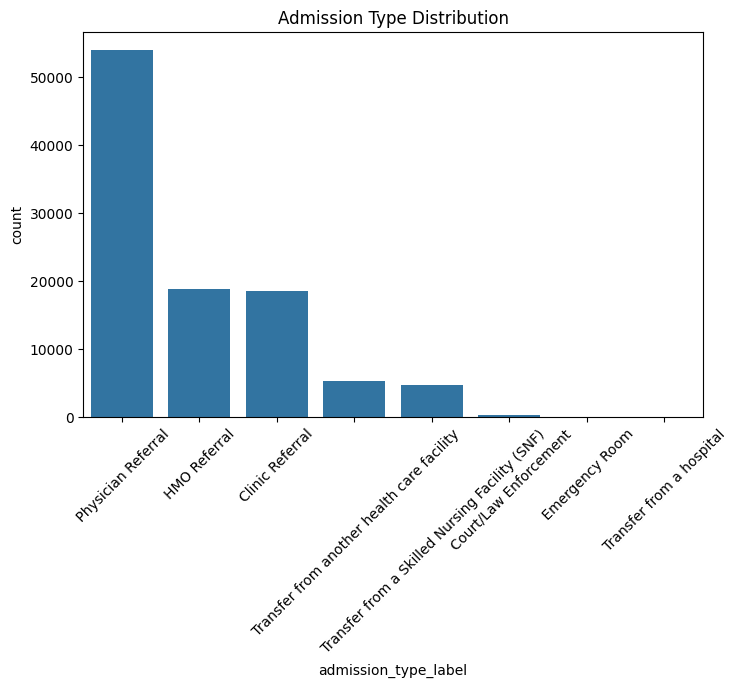

In [10]:
# Readmission classes

plt.figure(figsize=(8, 5))
sns.countplot(x='admission_type_label', data=data, order=data['admission_type_label'].value_counts().index)
plt.title("Admission Type Distribution")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Number of Inpatient Visits')

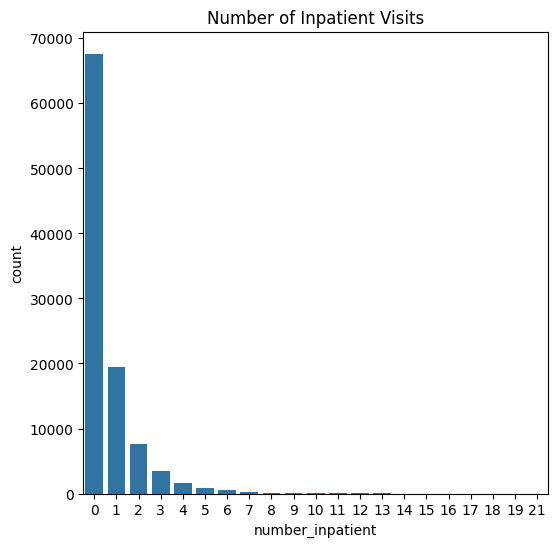

In [11]:
# Inpatient Visits

plt.figure(figsize=(6, 6))
sns.countplot(x='number_inpatient', data=data)
plt.title("Number of Inpatient Visits")


Text(0.5, 1.0, 'Age Distribution of Patients')

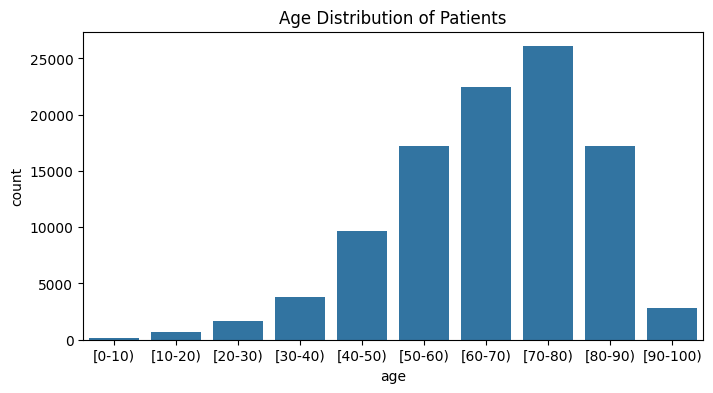

In [12]:
# Age distribution

plt.figure(figsize=(8, 4))
sns.countplot(x='age', data=data, order=sorted(data['age'].unique()))
plt.title("Age Distribution of Patients")


Text(0.5, 1.0, 'Top Admission Types')

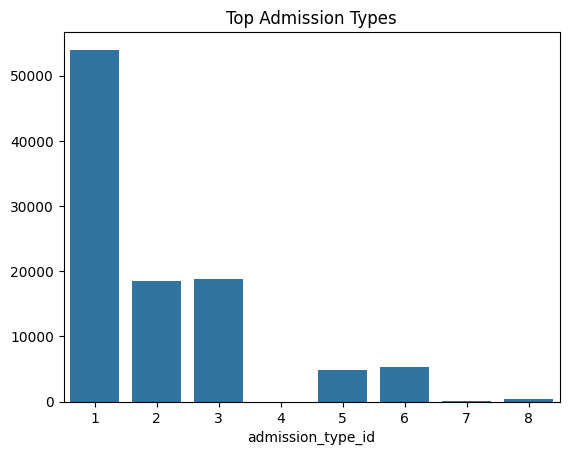

In [13]:
# Admission Types

top_admissions = data['admission_type_id'].value_counts().head(10)
sns.barplot(x=top_admissions.index, y=top_admissions.values)
plt.title("Top Admission Types")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Caucasian'),
  Text(1, 0, 'AfricanAmerican'),
  Text(2, 0, '?'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Hispanic')])

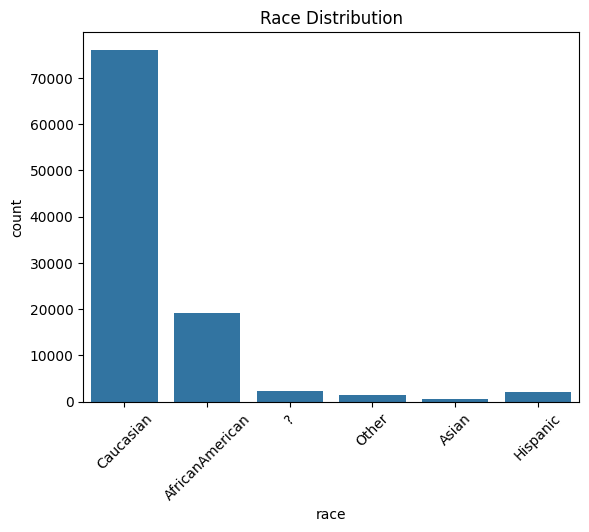

In [14]:
# Race and Ethnicity

sns.countplot(x='race', data=data)
plt.title("Race Distribution")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Top 10 Discharge Dispositions')

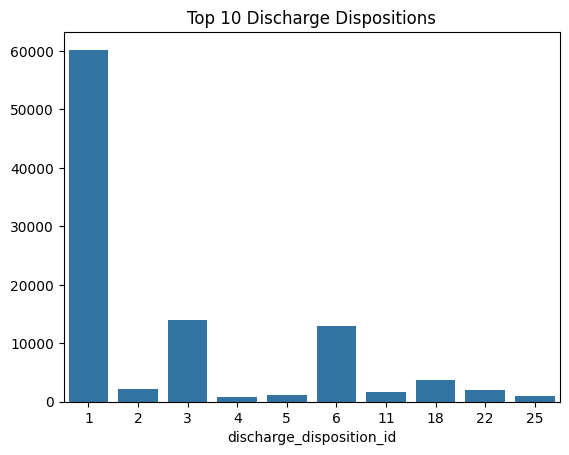

In [15]:
# Discharge disposition

# (See IDS_Mapping.csv for code)

top_dispositions = data['discharge_disposition_id'].value_counts().head(10)
sns.barplot(x=top_dispositions.index, y=top_dispositions.values)
plt.title("Top 10 Discharge Dispositions")


Text(0.5, 1.0, 'Histogram: Time in Hospital')

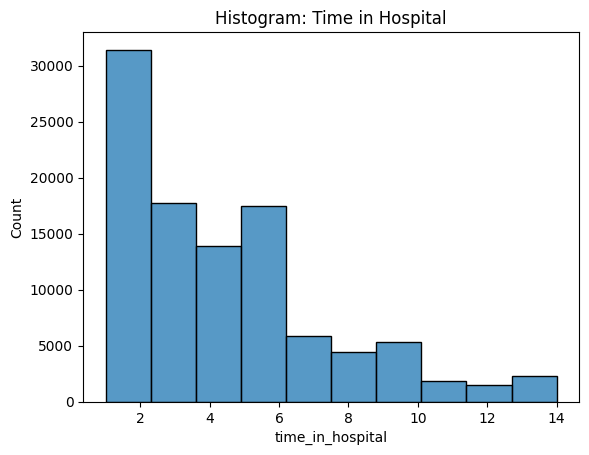

In [16]:
# Time in hospital

sns.histplot(data['time_in_hospital'], bins=10, kde=False)
plt.title("Histogram: Time in Hospital")


Text(0.5, 1.0, 'Number of Medications')

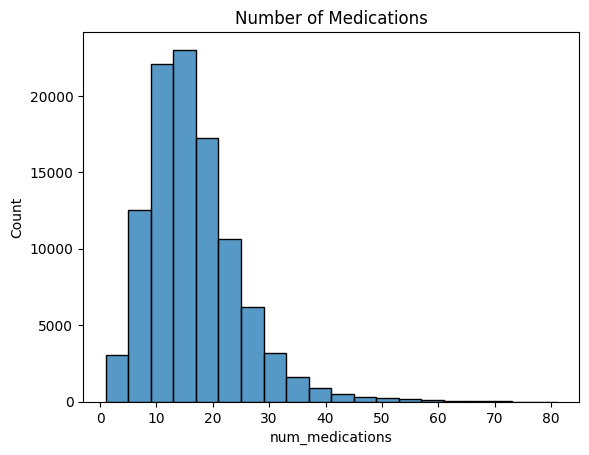

In [17]:
# Medication count

sns.histplot(data['num_medications'], bins=20)
plt.title("Number of Medications")


Text(0.5, 1.0, 'Correlation Heatmap')

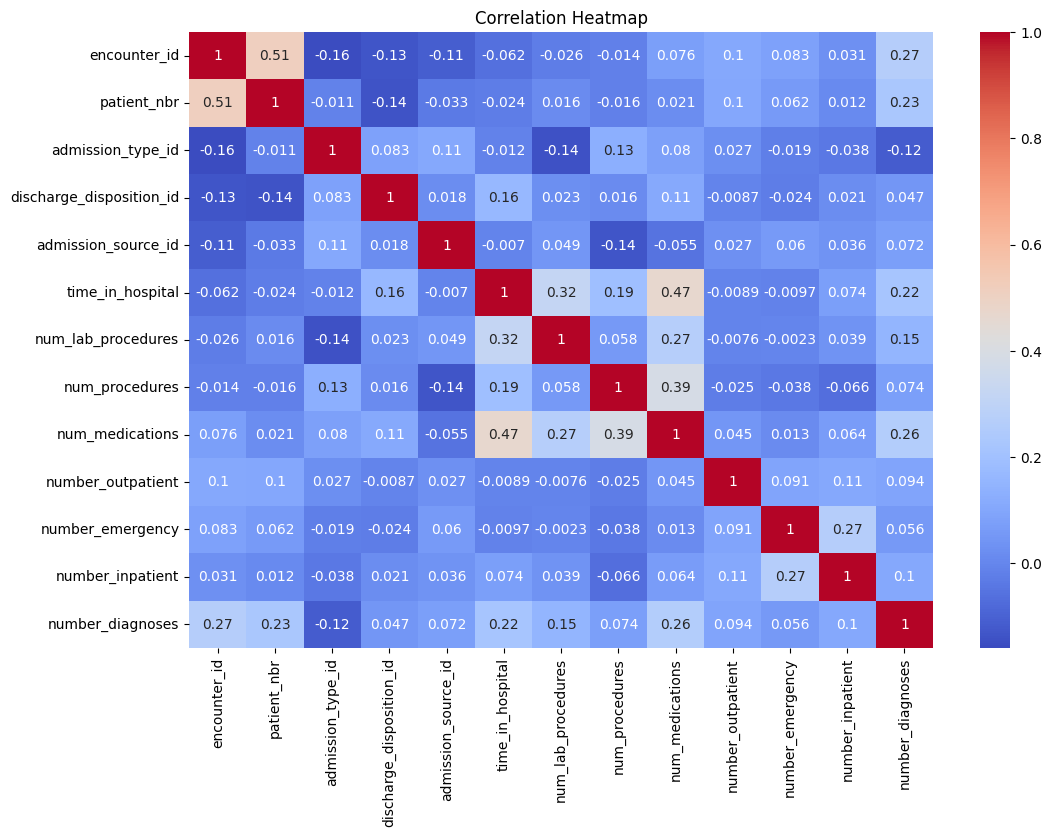

In [18]:
# Correlation heatmap

numeric_cols = data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


## C) Feature Engineering

  readmitted  readmitted_flag
0         NO                0
1        >30                0
2         NO                0
3         NO                0
4         NO                0


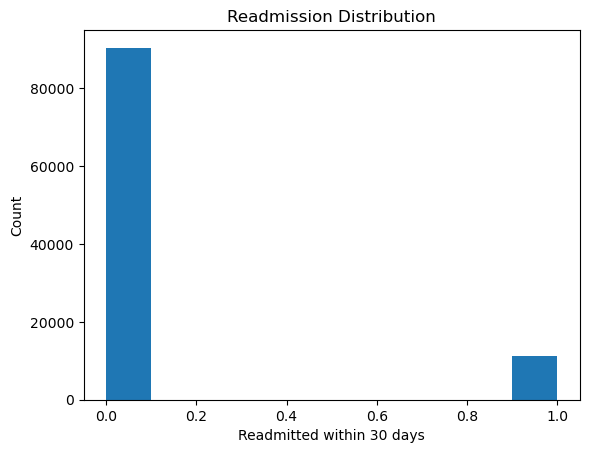

In [6]:
data['readmitted_flag'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(data[['readmitted', 'readmitted_flag']].head())

plt.hist(data['readmitted_flag'])
plt.title("Readmission Distribution")
plt.xlabel("Readmitted within 30 days")
plt.ylabel("Count")
plt.show()

In [7]:
# Generelize some of the diagnostic codes in larger groups for ML

def map_diag(code):
    try:
        code = float(code)
        if 390 <= code <= 459 or code == 785:
            return 'Circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'Respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif 800 <= code <= 999:
            return 'Injury'
        elif 710 <= code <= 739:
            return 'Musculoskeletal'
        elif 580 <= code <= 629 or code == 788:
            return 'Genitourinary'
        else:
            return 'Other'
    except:
        return 'Unknown'
for col in ['diag_1', 'diag_2', 'diag_3']:
    data[col + '_group'] = data[col].apply(map_diag)
    print(f"{col}_group value counts:")
    print(data[col + '_group'].value_counts())
    print("\n")



diag_1_group value counts:
Circulatory        30437
Other              19960
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Musculoskeletal     4957
Unknown             1666
Name: diag_1_group, dtype: int64


diag_2_group value counts:
Circulatory        31881
Other              26564
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Unknown             2894
Injury              2428
Musculoskeletal     1764
Name: diag_2_group, dtype: int64


diag_3_group value counts:
Circulatory        30306
Other              25993
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Unknown             6481
Digestive           3930
Injury              1946
Musculoskeletal     1915
Name: diag_3_group, dtype: int64




In [8]:
# Create new features

data['total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data['has_insulin'] = data['insulin'].apply(lambda x: 0 if x == 'No' else 1)
data['has_change'] = data['change'].apply(lambda x: 1 if x == 'Ch' else 0)
data['has_diabetes_med'] = data['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)
print(data[['total_visits', 'has_insulin', 'has_change', 'has_diabetes_med']].head())


   total_visits  has_insulin  has_change  has_diabetes_med
0             0            0           0                 0
1             0            1           1                 1
2             3            0           0                 1
3             0            1           1                 1
4             0            1           1                 1


In [9]:
# Create age_group feature by cleaning brackets in 'age' column

data['age_group'] = data['age'].str.replace('[\[\]\<\>]', '', regex=True)


In [10]:
# One-hot encode selected categorical features only
selected_cats = ['race', 'gender', 'age_group', 'medical_specialty',
                 'diag_1_group', 'diag_2_group', 'diag_3_group']

df = pd.get_dummies(data, columns=selected_cats, drop_first=True)


## Model: XGBoost

In [18]:
# Install XGBoost if not already installed
!pip install xgboost -q

# Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Make a copy of the dataset
df_model = data.copy()

# Step 2: Drop irrelevant columns
df_model.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Step 3: Encode categorical features
for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Step 4: Define features (X) and target (y)
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Confusion Matrix:
 [[2285    0    0]
 [   0 3159 3958]
 [   0 2050 8902]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2285
           1       0.61      0.44      0.51      7117
           2       0.69      0.81      0.75     10952

    accuracy                           0.70     20354
   macro avg       0.77      0.75      0.75     20354
weighted avg       0.70      0.70      0.69     20354

Accuracy Score: 0.7048246045003439
ROC AUC Score: 0.8441648322630574


In [26]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Base XGBoost model
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Confusion Matrix:
 [[2285    0    0]
 [   0 3101 4016]
 [   0 1876 9076]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2285
           1       0.62      0.44      0.51      7117
           2       0.69      0.83      0.75     10952

    accuracy                           0.71     20354
   macro avg       0.77      0.75      0.76     20354
weighted avg       0.70      0.71      0.70     20354

Accuracy Score: 0.7105237299793652
ROC AUC Score: 0.8481285382389864


In [28]:
# prompt: need a different code (method of tuning) to improve the accuracy I am receiving in the preceding step

from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Base XGBoost model
xgb_clf_rs = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Run RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf_rs,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled. Increase for more thorough search.
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Randomized Search):", random_search.best_params_)

# Best model
best_model_rs = random_search.best_estimator_

# Predict and evaluate
y_pred_rs = best_model_rs.predict(X_test)
y_proba_rs = best_model_rs.predict_proba(X_test)

print("Confusion Matrix (Randomized Search):\n", confusion_matrix(y_test, y_pred_rs))
print("\nClassification Report (Randomized Search):\n", classification_report(y_test, y_pred_rs))
print("Accuracy Score (Randomized Search):", accuracy_score(y_test, y_pred_rs))
print("ROC AUC Score (Randomized Search):", roc_auc_score(y_test, y_proba_rs, multi_class='ovr'))



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:51:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (Randomized Search): {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Confusion Matrix (Randomized Search):
 [[2285    0    0]
 [   0 3112 4005]
 [   0 1878 9074]]

Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2285
           1       0.62      0.44      0.51      7117
           2       0.69      0.83      0.76     10952

    accuracy                           0.71     20354
   macro avg       0.77      0.76      0.76     20354
weighted avg       0.70      0.71      0.70     20354

Accuracy Score (Randomized Search): 0.71096590350791
ROC AUC Score (Randomized Search): 0.8481766750780754


## Model: Logistic Regression

In [22]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Prepare data
df_lr = data.copy()

# Drop unused or ID-like columns
df_lr.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1, inplace=True)

# Drop diagnosis codes if grouped versions are used
df_lr.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, errors='ignore', inplace=True)

# Handle object/categorical columns with one-hot encoding
df_lr = pd.get_dummies(df_lr, drop_first=True)

# Define X and y
X = df_lr.drop('readmitted_flag', axis=1)
y = df_lr['readmitted_flag']

### Try 1 (imbalanced)

In [23]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[18030    39]
 [ 2260    25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.39      0.01      0.02      2285

    accuracy                           0.89     20354
   macro avg       0.64      0.50      0.48     20354
weighted avg       0.83      0.89      0.84     20354

Accuracy Score: 0.8870492286528446
ROC AUC Score: 0.6489135677689692


### Comment

Class imbalance observed as Recall for Class 1 is 0.01

### Try 2 (balanced)

In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

### Try 3 (hyperparameter tuning)

In [20]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

lr = LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr, param_grid, cv=3, scoring='f1', verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

# Evaluate best model
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix:
 [[12004  6065]
 [ 1052  1233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77     18069
           1       0.17      0.54      0.26      2285

    accuracy                           0.65     20354
   macro avg       0.54      0.60      0.51     20354
weighted avg       0.84      0.65      0.71     20354

Accuracy Score: 0.6503389997052177
ROC AUC Score: 0.649408558221929


### Comment

We performed hyperparameter tuning on Logistic Regression using 3-fold cross-validation across 4 parameter settings. The best model used:

C = 0.01 (stronger regularization)

class_weight = 'balanced' (to address class imbalance)

penalty = 'l2' and solver = 'lbfgs'

Performance:

Accuracy: 65.0%

Recall (Class 1): 54% → the model successfully identified more than half of true readmissions

Precision (Class 1): 17% → many false positives, but expected in imbalanced medical datasets

ROC AUC Score: 0.65 → moderate ability to separate classes

While overall accuracy dropped compared to the imbalanced baseline (~89%), this model made a much stronger effort to detect actual readmissions, reflecting the typical precision-recall tradeoff in healthcare classification problems.

This model serves as a strong baseline and reveals that our features do carry signal for predicting 30-day readmission.

Stopping here

## Model: LightGBM

Abandoned effort - known issues with LightGBM not working due to datatype issues
https://github.com/microsoft/LightGBM/issues/4301

In [14]:
# # Install lightgbm
# !pip install lightgbm -q

# # Import libraries
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# from sklearn.preprocessing import LabelEncoder

# # Get data
# df_model_lgb = data.copy()
# df_model_lgb.drop(['encounter_id','patient_nbr','readmitted'], axis=1, inplace=True)

In [15]:
# # Label encoder
# for col in df_model_lgb.select_dtypes(include=['object']).columns:
#     df_model_lgb[col] = LabelEncoder().fit_transform(df_model_lgb[col])

# # Define features and binary target
# X = df_model_lgb.drop('readmitted_flag', axis=1)
# y = df_model_lgb['readmitted_flag']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Changing datatypes as otherwise LightGBM crashes
# X_train_np = X_train.to_numpy().astype('float64')
# X_test_np = X_test.to_numpy().astype('float64')
# y_train_np = y_train.to_numpy()
# y_test_np = y_test.to_numpy()

In [ ]:
# # Train LightGBM binary classifier

# lgb_model = lgb.LGBMClassifier(
#     objective='binary',
#     n_estimators=100,
#     max_depth=6,
#     num_leaves=31,
#     learning_rate=0.1,
#     random_state=42
# )
# lgb_model.fit(X_train_np, y_train_np)

# # Predict and evaluate
# y_pred = lgb_model.predict(X_test_np)
# y_proba = lgb_model.predict_proba(X_test_np)[:, 1]

# print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred))
# print("\nClassification Report:\n", classification_report(y_test_np, y_pred))
# print("Accuracy Score:", accuracy_score(y_test_np, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test_np, y_proba))

## Model: Catboost

In [1]:
# Did conda install - the pip install in Jupyter is not installing correctly
# !pip install catboost

In [25]:
# Imports
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Prepare data
df_cat = data.copy()

# Drop unused columns
df_cat.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1, inplace=True)

# Drop raw diagnosis codes if grouped versions are used
df_cat.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, errors='ignore', inplace=True)

# Identify categorical columns — CatBoost handles these without label encoding
cat_features = df_cat.select_dtypes(include='object').columns.tolist()

# Define features and target
X = df_cat.drop('readmitted_flag', axis=1)
y = df_cat['readmitted_flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Try 1

In [27]:
# Train CatBoost
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[18051    18]
 [ 2258    27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.60      0.01      0.02      2285

    accuracy                           0.89     20354
   macro avg       0.74      0.51      0.48     20354
weighted avg       0.86      0.89      0.84     20354

Accuracy Score: 0.8881792276702368
ROC AUC Score: 0.681464064388238


### Comment

The baseline CatBoost model achieved 88.8% accuracy, largely by predicting the majority class. However, it struggled with identifying actual readmissions:

Class 1 Recall: only 1%

Class 1 Precision: 60%, but with very few positive predictions

ROC AUC: 0.68 (moderate)

The model is highly biased toward the negative class due to imbalance in the dataset. We will explore class weighting in the next attempt.

### Try 2 (Change eval metric from AUC to Recall)

In [28]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    class_weights=[1, 3],  # weights tuned over multiple runs
    eval_metric='Recall',
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[17619   450]
 [ 2032   253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93     18069
           1       0.36      0.11      0.17      2285

    accuracy                           0.88     20354
   macro avg       0.63      0.54      0.55     20354
weighted avg       0.84      0.88      0.85     20354

Accuracy Score: 0.8780583669057679
ROC AUC Score: 0.6835443951601525


### Comment

Applying class weights improved the model’s ability to identify readmissions:

Recall (Class 1) increased from 1% → 11%

Accuracy remained high at 87.8%

ROC AUC improved slightly to 0.68

While still favoring the majority class, this attempt shows early progress in addressing imbalance. More aggressive weighting may further boost recall.

### Try 3 - increase weight further

In [29]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    class_weights=[1, 5],  # weights tuned over multiple runs
    eval_metric='Recall',
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[15875  2194]
 [ 1572   713]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     18069
           1       0.25      0.31      0.27      2285

    accuracy                           0.81     20354
   macro avg       0.58      0.60      0.58     20354
weighted avg       0.84      0.81      0.82     20354

Accuracy Score: 0.8149749435000492
ROC AUC Score: 0.6838425956033116


### Comment

Increasing the class weight for readmitted patients led to a notable boost in recall:

Recall (Class 1) improved to 31%

Precision (Class 1) dropped to 25%

Overall Accuracy: 81.5%

ROC AUC: 0.68 (similar to prior runs)

This attempt marks a better balance between recall and accuracy, demonstrating that tuning class_weights is effective in shifting model focus toward minority class detection.

Stopping here